In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [45]:
multivariate_data=test_new.loc[500:24999,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
multivariate_data = multivariate_data.set_index('dateTime')
multivariate_data=multivariate_data.loc[::-1]

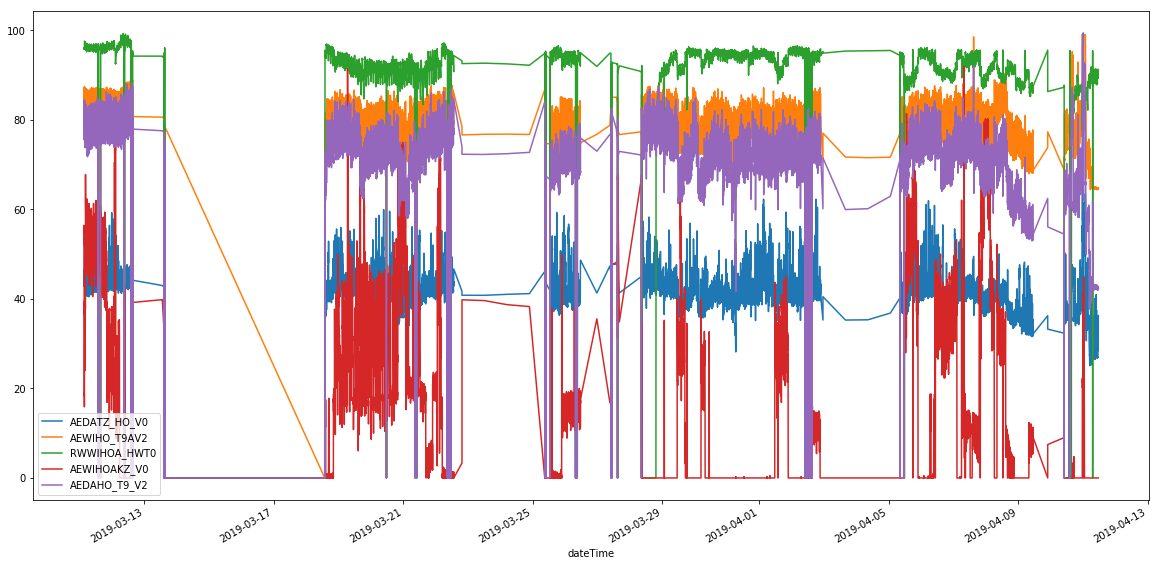

In [46]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [47]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

shape of multivariate_data:  (24500, 5)
shape of multivariate_data_drop_zero:  (13212, 5)


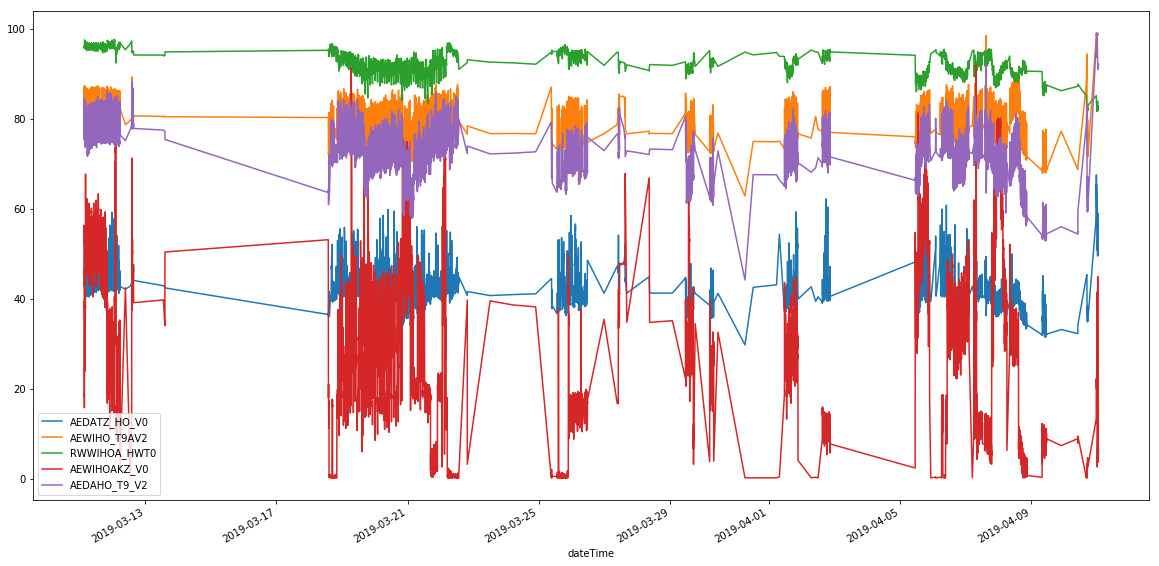

In [48]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

multivariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [49]:
print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
dataset=np.array(multivariate_data_drop_zero)
print(dataset)

multivariate_data_drop_zero head: 
                      AEDATZ_HO_V0  AEWIHO_T9AV2  RWWIHOA_HWT0  AEWIHOAKZ_V0  \
dateTime                                                                      
2019-03-11 03:14:00     46.119388     79.178306     96.063659     54.778231   
2019-03-11 03:15:00     46.534541     81.659117     96.103362     54.704687   
2019-03-11 03:16:00     46.555631     86.055430     96.038536     56.415287   
2019-03-11 03:17:00     45.940449     87.113691     95.957508     55.230932   
2019-03-11 03:18:00     44.218947     87.266264     96.018279     53.037212   

                     AEDAHO_T9_V2  
dateTime                           
2019-03-11 03:14:00     83.327361  
2019-03-11 03:15:00     84.314814  
2019-03-11 03:16:00     84.380943  
2019-03-11 03:17:00     83.279853  
2019-03-11 03:18:00     79.963124  
[[46.11938838 79.17830628 96.06365927 54.77823091 83.32736136]
 [46.53454053 81.65911665 96.10336224 54.7046866  84.31481413]
 [46.55563074 86.05542972 96.038

In [51]:
NumberOfElements=int(len(dataset)*0.8)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

multiple_ip_train_data=dataset[0:NumberOfElements]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]

Number of Elements for training:  10569
dataset length:  13212
(10569, 5)


In [52]:
from numpy import array
# from numpy import hstack
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
    
n_steps = 1
# convert into input/output
X_multiple_ip, y_multiple_ip = split_sequences(multiple_ip_train_data, n_steps)
print(X_multiple_ip.shape, y_multiple_ip.shape)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

(10569, 1, 4) (10569,)


In [53]:
n_features = X_multiple_ip.shape[2]
print(n_features)

4


In [54]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import SGD

lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=100

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
model.fit(X_multiple_ip, y_multiple_ip, batch_size=batch_size, epochs=epochs, validation_split=0.2 ,verbose=1,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/multivariate_100.h5', 
                                     save_best_only=True)])

Train on 8455 samples, validate on 2114 samples
Epoch 1/100
8455/8455 [==============================] - 2s 239us/step - loss: 553.9990 - acc: 0.0000e+00 - val_loss: 34.0056 - val_acc: 0.0000e+00
Epoch 2/100
8455/8455 [==============================] - 1s 68us/step - loss: 408.2006 - acc: 0.0000e+00 - val_loss: 36.7135 - val_acc: 0.0000e+00
Epoch 3/100
8455/8455 [==============================] - 1s 69us/step - loss: 372.2493 - acc: 0.0000e+00 - val_loss: 24.6757 - val_acc: 0.0000e+00
Epoch 4/100
8455/8455 [==============================] - 1s 78us/step - loss: 374.4461 - acc: 0.0000e+00 - val_loss: 18.0606 - val_acc: 0.0000e+00
Epoch 5/100
8455/8455 [==============================] - 1s 85us/step - loss: 339.9198 - acc: 0.0000e+00 - val_loss: 19.4778 - val_acc: 0.0000e+00
Epoch 6/100
8455/8455 [==============================] - 1s 73us/step - loss: 312.6160 - acc: 0.0000e+00 - val_loss: 34.8419 - val_acc: 0.0000e+00
Epoch 7/100
8455/8455 [==============================] - 1s 102us/ste

8455/8455 [==============================] - 0s 55us/step - loss: 223.4191 - acc: 0.0000e+00 - val_loss: 21.4924 - val_acc: 0.0000e+00
Epoch 57/100
8455/8455 [==============================] - 0s 52us/step - loss: 230.3313 - acc: 0.0000e+00 - val_loss: 21.4907 - val_acc: 0.0000e+00
Epoch 58/100
8455/8455 [==============================] - 0s 52us/step - loss: 233.8211 - acc: 0.0000e+00 - val_loss: 21.4842 - val_acc: 0.0000e+00
Epoch 59/100
8455/8455 [==============================] - 1s 60us/step - loss: 233.0502 - acc: 0.0000e+00 - val_loss: 21.4838 - val_acc: 0.0000e+00
Epoch 60/100
8455/8455 [==============================] - 0s 58us/step - loss: 234.2455 - acc: 0.0000e+00 - val_loss: 21.4771 - val_acc: 0.0000e+00
Epoch 61/100
8455/8455 [==============================] - 0s 57us/step - loss: 232.2383 - acc: 0.0000e+00 - val_loss: 21.4769 - val_acc: 0.0000e+00
Epoch 62/100
8455/8455 [==============================] - 0s 56us/step - loss: 232.7763 - acc: 0.0000e+00 - val_loss: 21.4769

In [41]:
X_multiple_test_ip, y_multiple_test_op = split_sequences(multiple_ip_test_set, n_steps)
print(X_multiple_test_ip.shape)
x_input = X_multiple_test_ip.reshape((X_multiple_test_ip.shape[0], n_steps, n_features))

(529, 1, 5)


In [42]:
yhat = model.predict(x_input, verbose=1)

529/529 [==============================] - 0s 496us/step


size of actual op:  529
size of predicted op:  529


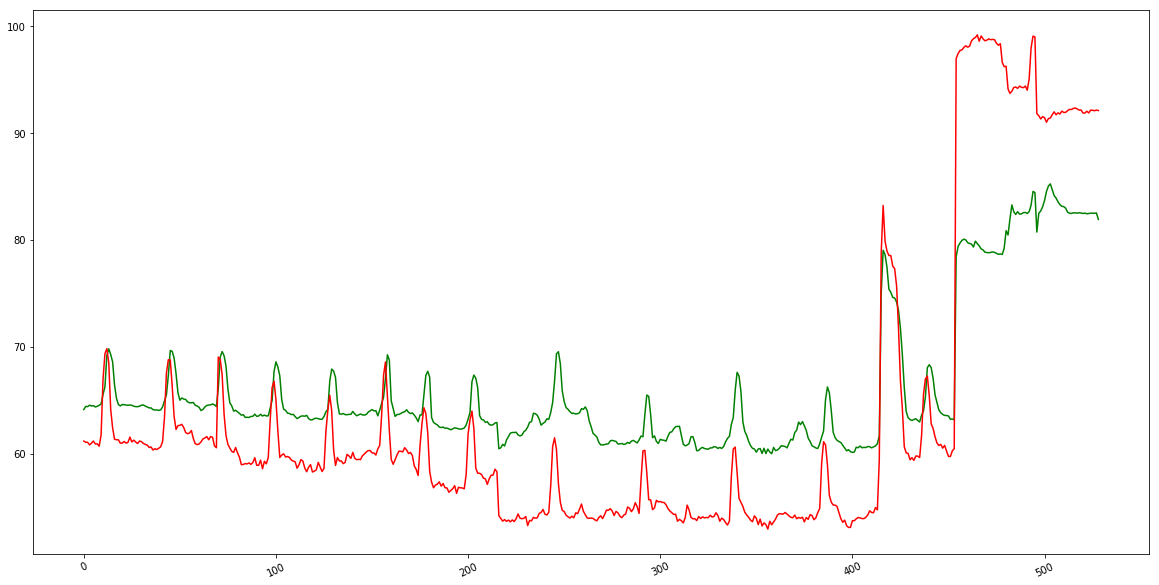

In [43]:
print('size of actual op: ',y_multiple_test_op.size)
print('size of predicted op: ',yhat.size)
plt.plot(yhat,color='green')
plt.plot(y_multiple_test_op,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(y_multiple_test_op,yhat)
print(Error)

56.49452769830431
